# 第五题：实现层次聚类，并与其他聚类算法进行对比（选做）

实验内容：
1. 实现三种形式的层次聚类（最小距离、最大距离、平均距离）
2. 至少选择两个数据集
3. 在这两个数据集上运行自己实现的层次聚类算法和sklearn的KMeans，GMM，DBSCAN，共4个聚类算法
4. 计算外部指标FMI和NMI
5. 绘制4种聚类的聚类效果

## 导入模块

In [1]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 导入数据集

In [2]:
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples = 1500, factor = 0.5, noise = 0.05, random_state = 32)
X2, y2 = datasets.make_moons(n_samples = 1500, noise = 0.05, random_state = 32)

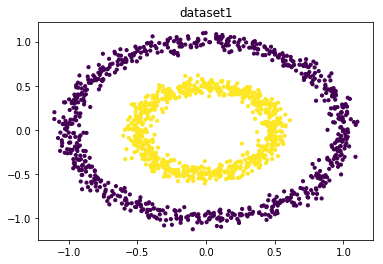

In [3]:
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = y1)

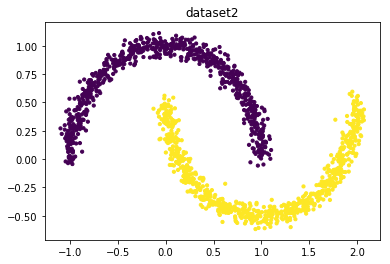

In [4]:
plt.title('dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = y2)

## 实现层次聚类

In [5]:
def _dist(a, b):
    '''
    input: a: shape=(m1, n)
           b: shape=(m2, n)
    ret  : shape=(m1, m2)
    '''
    a = np.mat(a)
    b = np.mat(b)
    
    return np.sqrt(-2*a.dot(b.T)+np.square(a).sum(axis=1) + np.square(b.T).sum(axis=0))

a = np.mat([[0,1], [1, 0]])
b = np.mat([[1,1], [2, 1], [2, 2]])



def min_dis(a, b):
    return np.min(_dist(a, b))


def max_dis(a, b):
    return np.max(_dist(a, b))

def avg_dis(a, b):
    t = _dist(a, b)
    return np.sum(t) / (t.shape[0] * t.shape[1])

# print(dist(a,b))
print(_dist(a,b))

print(_dist(a,b).shape)
    
print(min_dis(a,b))
print(max_dis(a,b))
print(avg_dis(a,b))

[[ 1.          2.          2.23606798]
 [ 1.          1.41421356  2.23606798]]
(2, 3)
1.0
2.2360679775
1.64772491956


In [6]:
a = _dist(X1, X1)

In [7]:
print(a)
print(a.shape)

[[ 0.          0.97783585  0.73607679 ...,  0.90618653  0.68115805
   1.51261868]
 [ 0.97783585  0.          0.54780199 ...,  0.60206541  0.53049466
   0.53959553]
 [ 0.73607679  0.54780199  0.         ...,  0.96032288  0.06253274
   0.9524004 ]
 ..., 
 [ 0.90618653  0.60206541  0.96032288 ...,  0.          0.91018586
   1.01090785]
 [ 0.68115805  0.53049466  0.06253274 ...,  0.91018586  0.          0.9645668 ]
 [ 1.51261868  0.53959553  0.9524004  ...,  1.01090785  0.9645668   0.        ]]
(1500, 1500)


In [ ]:
class myAgglomerativeClustering():
    def __init__(self, n_clusters = 2, linkage='single'):
        self.n_clusters = n_clusters
        self.linkage = linkage
    
    def fit(self, X):
        self.label = np.array([i for i in range(1, X.shape[0]+1)])
        # X[y == 1]
        
#         t = np.unique(self.label)
        time = len(np.unique(self.label))
        while True:
            print(time)
            time -= 1
            t = np.unique(self.label)
            
            if len(t) == self.n_clusters:
                break
            
            mini, mini_ti, mini_tj = 1000000000000, None, None
            for i in range(len(t) - 1):
                for j in range(i + 1,len(t)):
                    a = X[self.label == t[i]]
                    b = X[self.label == t[j]]
                    dis = None
                    
                    if self.linkage == 'single':
                        dis = min_dis(a, b)
                    elif self.linkage == 'complete':
                        pass
                    elif self.linkage == '':
                        pass
                    else:
                        pass
#                         raise Exception()
                    
                    if dis < mini:
                        mini = dis
                        mini_ti = t[i]
                        mini_tj = t[j]
            
            for i in range(len(self.label)):
                if self.label[i] == mini_tj:
                    self.label[i] = mini_ti
        
        
    def predict(self):
        return self.label

In [ ]:
model = myAgglomerativeClustering()
model.fit(X1)
plt.scatter(X[:, 0], X[:, 1], c = model.predict())

1500
1499
1498
1497
1496
1495
1494
1493
1492
1491
1490
1489
1488
1487
1486
1485
1484
1483
1482
1481
1480
1479
1478
1477
1476
1475
1474
1473
1472
1471
1470
1469
1468
1467
1466
1465
1464
1463
1462
1461
1460
1459
1458
1457
1456
1455
1454
1453
1452
1451
1450
1449
1448
1447
1446
1445
1444
1443
1442
1441
1440
1439
1438
1437
1436
1435
1434
1433
1432
1431
1430
1429
1428
1427
1426
1425
1424
1423
1422
1421
1420
1419
1418
1417
1416
1415
1414
1413
1412
1411
1410
1409
1408
1407
1406
1405
1404
1403
1402
1401
1400
1399
1398
1397
1396
1395
1394
1393
1392
1391
1390
1389
1388
1387
1386
1385
1384
1383
1382
1381
1380
1379
1378
1377
1376
1375
1374
1373
1372
1371
1370
1369
1368
1367
1366
1365
1364
1363
1362
1361
1360
1359
1358
1357
1356
1355
1354
1353
1352
1351
1350
1349
1348
1347
1346
1345
1344
1343
1342
1341
1340
1339
1338
1337
1336
1335
1334
1333
1332
1331
1330
1329
1328
1327
1326
1325
1324
1323
1322
1321
1320
1319
1318
1317
1316
1315
1314
1313
1312
1311
1310
1309
1308
1307
1306
1305
1304
1303
1302
1301
